# Решение нелинейных уравнений и систем
## Вариант 1.1.9 + 2.9

## Задание 1

Метод Ньютона для:
$$ f(x) = x+1/x-10cos(x) $$

<ipython-input-15-a421ecce8147>:13: RuntimeWarning: divide by zero encountered in double_scalars
  return x + 1 / x - 10 * numpy.cos(x)


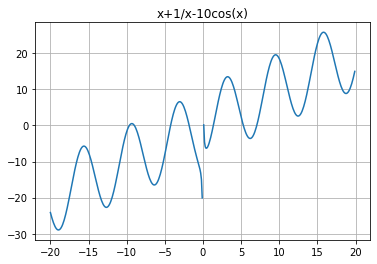

In [15]:
import numpy
import math
import matplotlib.pyplot as plt

def asymptote_checker(argument, function):
    try:
        function(argument)
        return True
    except ZeroDivisionError:
        return False

def func(x):
    return x + 1 / x - 10 * numpy.cos(x)

args_right = numpy.arange(0, 20, 0.1)
args_left = numpy.arange(-20, 0, 0.1)

vals_right = [func(v) for v in args_right]
vals_left = [func(v) for v in args_left]

args = []
args.extend(args_left)
args.extend(args_right)

vals = []
vals.extend(vals_left)
vals.extend(vals_right)

# args = numpy.around(numpy.arange(-20, 20, 0.1), decimals=10)
# vals = numpy.array([func(v) if asymptote_checker(v, func) else float('nan') for v in args])

plt.plot(args, vals)
plt.grid(True)
plt.title('x+1/x-10cos(x)')
plt.show()

Как мы видим, у нас на графике 8 корней.

<ipython-input-15-a421ecce8147>:13: RuntimeWarning: divide by zero encountered in double_scalars
  return x + 1 / x - 10 * numpy.cos(x)


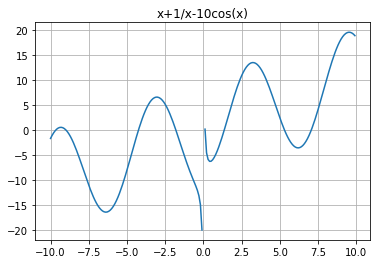

In [16]:
args_right = numpy.arange(0, 10, 0.1)
args_left = numpy.arange(-10, 0, 0.1)

vals_right = [func(v) for v in args_right]
vals_left = [func(v) for v in args_left]

args = []
args.extend(args_left)
args.extend(args_right)

vals = []
vals.extend(vals_left)
vals.extend(vals_right)

plt.plot(args, vals)
plt.grid(True)
plt.title('x+1/x-10cos(x)')
plt.show()

Рассмотрим поведение нашей функции за пределами отрезка от -10 до 10.

Рассмотрим уравнение $$ x+1/x-10cos(x)  = 0$$ $$ x+1/x = 10cos(x) $$
При х > 10 правая часть будет от -10 до +10, а левая от 10, не включая, до бесконечности. Следовательно при x больше 10 не существует корней

Аналогично докзывается для x < -10

Корни расположены в промежутках:
[-10;-9.5],
[-9.3;-8.7],
[-5;-4],
[-2;-1],
[0.1;0.5],
[1;1.5],
[5;5.5],
[7;7.5]

Вычислим конкретные значения методом бисекции.

Result with using bisection(blue line):
-9.648076163949554
Result with using newton method (orange line)
-9.648076163948998
--------------------------------
--------------------------------
Result with using bisection(blue line):
-8.999938889787336
Result with using newton method (orange line)
-8.999938889787096
--------------------------------
--------------------------------
Result with using bisection(blue line):
-4.247530663896214
Result with using newton method (orange line)
-4.247530663896268
--------------------------------
--------------------------------
Result with using bisection(blue line):
-1.8092457710909002
Result with using newton method (orange line)
-1.8092457710914276
--------------------------------
--------------------------------
Result with using bisection(blue line):
0.10155456593274724
Result with using newton method (orange line)
0.10155456593343777
--------------------------------
--------------------------------
Result with using bisection(blue line):
1.3597

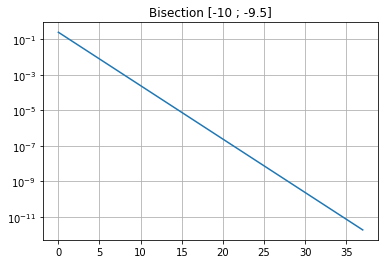

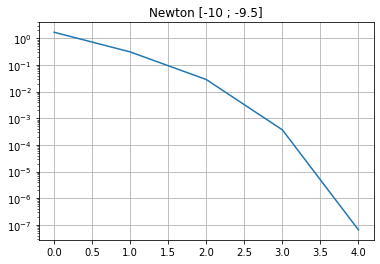

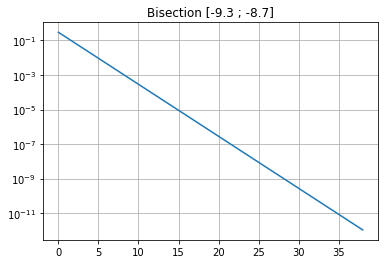

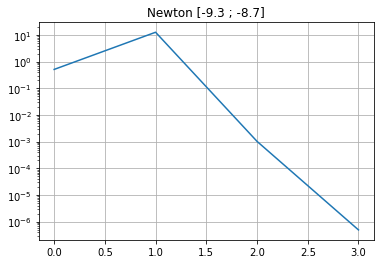

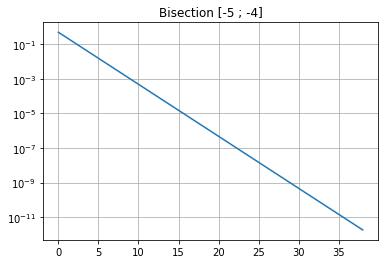

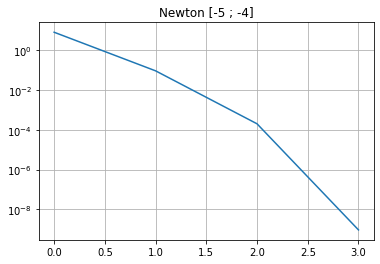

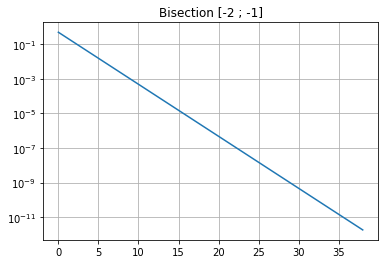

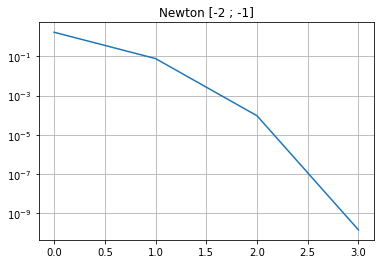

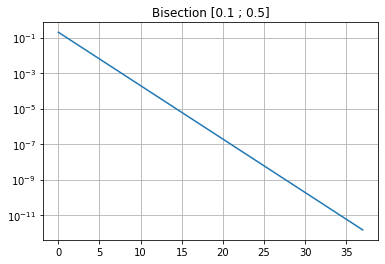

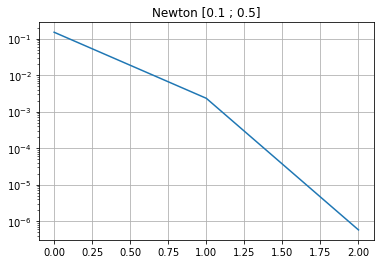

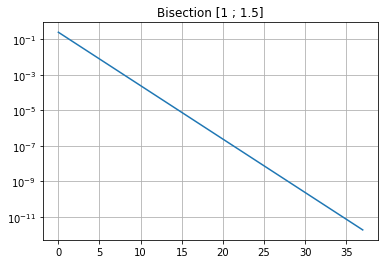

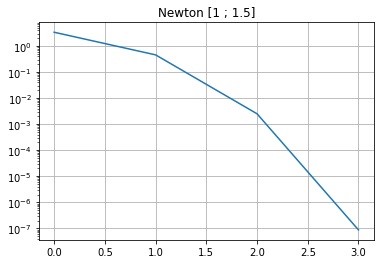

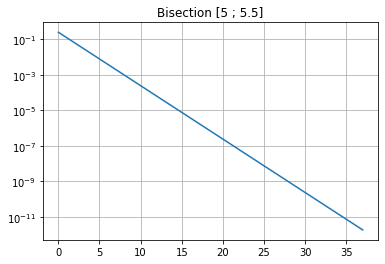

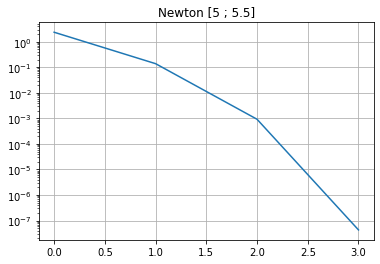

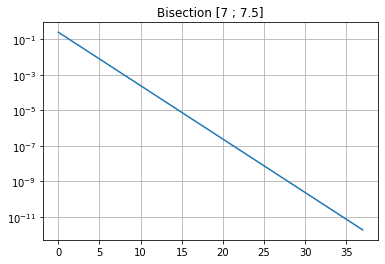

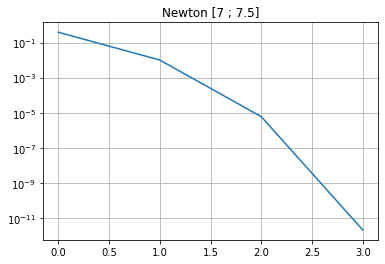

In [17]:
def bisection(a, b, eps):
    result_error  = numpy.array([])
    delta = math.fabs(a - b)
    counter = 0

    while delta >= eps * 2:
        counter += 1

        result_error = numpy.append(result_error, delta / 2)
        xc = (a + b) / 2

        if func(xc) == 0:
            return xc
        if func(xc) * func(b) < 0:
            a = xc
        else:
            b = xc

        delta = math.fabs(a - b)

    return (a + b) / 2, result_error, counter

def d_func(x):
    return 10 * numpy.sin(x) + 1 - (x ** (-2))

def newtonMethod(x0, eps):
    counter = 0
    res = numpy.array([])
    r = math.fabs(func(x0))

    while r >= eps:
        counter += 1
        res = numpy.append(res, r)
        x0 = x0 - (func(x0) / d_func(x0))
        r = math.fabs(func(x0))
    return x0, res, counter

# Точность
pr = 10 ** (-12)

x = [[-10, -9.5], [-9.3, -8.7], [-5,-4],
    [-2, -1], [0.1, 0.5], [1, 1.5],
    [5, 5.5], [7, 7.5]]

def func(x):
    return x + 1 / float(x) - 10 * numpy.cos(x)

for i in range(len(x)):
    result_bisection, error_bisection, counter1 = bisection(x[i][0], x[i][1], pr)
    result_newton, error_newton, counter2 = newtonMethod(x[i][0], pr)

    print('Result with using bisection(blue line):')
    print(result_bisection)
    print('Result with using newton method (orange line)')
    print(result_newton)

    plt.semilogy(numpy.arange(0, len(error_bisection), 1), error_bisection, base=10)

    plt.title("Bisection [{0} ; {1}]".format(x[i][0], x[i][1]))
    plt.grid(True)
    plt.show()
    print('--------------------------------')

    plt.semilogy(numpy.arange(0, len(error_newton), 1), error_newton, base=10)
    plt.title("Newton [{0} ; {1}]".format(x[i][0], x[i][1]))
    plt.grid(True)
    plt.show()
    print('--------------------------------')

## Вывод

Исходя из графиков модно заметить, что метод Ньютона для
данного случая оказался гораздо эффективней метода бисекции,
т.к для Ньютона понадобилось 3-6 шагов, а для Бирекции около 40.


## Задание 2

Наша система:

$$ f(x1, x2, x3) = \begin{pmatrix}x_1^2+x_2^2-x_3-10&\\(x_1 - 5)^2+x_2^2+(x_3 - 5)^2-100&\\x_1+x_2+x_3-10 \end{pmatrix} = 0$$


Нам необходимо решить СЛАУ:
$$F'(x^{(k)})\cdot \delta x^{(k)}=-F(x^{(k)})$$

с приближением равным:
$$x^{(k+1)}= x^{(k)}+ \delta x^{(k)}$$

Где $$F'(x^{(k)})$$ - матрица Якоби.
В нашем случае она будет иметь вид:

$$F'(x^{(k)}) = \begin{pmatrix}2x_1&  2x_2& 1&\\ 2x_1-10& 2x_2& 2x_3-10&\\ 1& 1& 1&\end{pmatrix}$$

В нашем случае система будет иметь два вещественных корня. Увидеть можно, взглянув на график (он после кода).

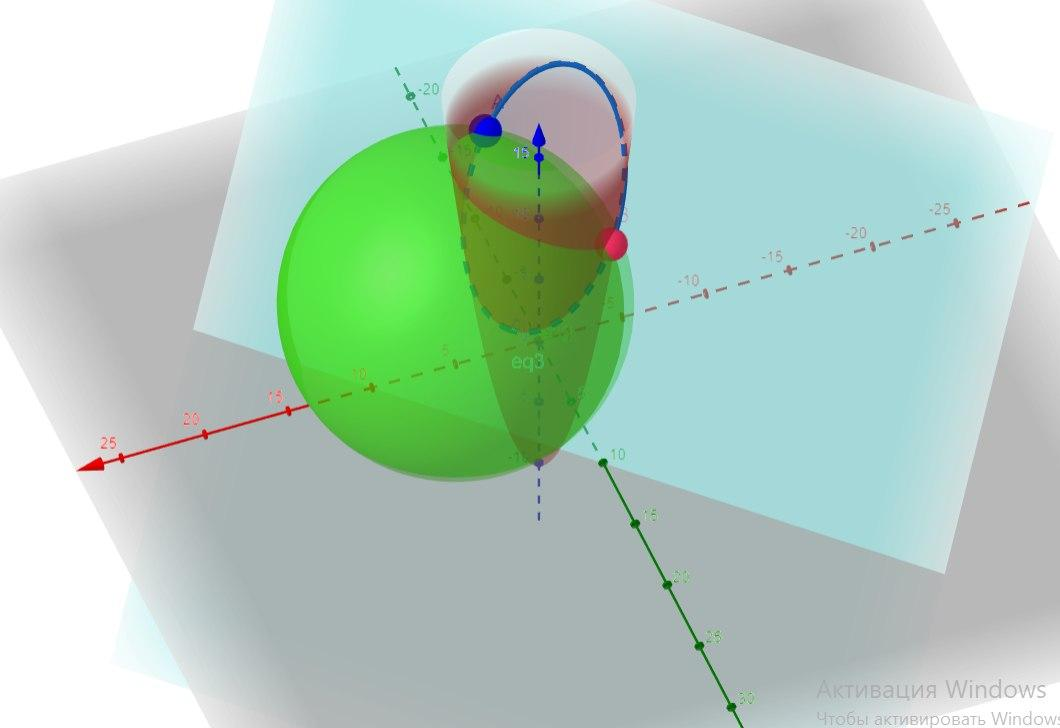

Result: [ 1.44535223 -4.58847217 13.14311994]
Result: [-3.10573828  3.20271901  9.90301927]


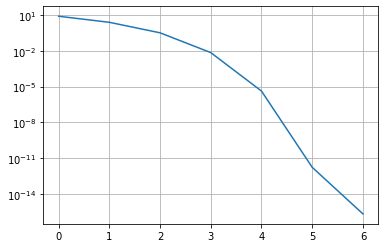

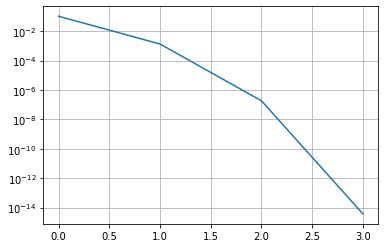

In [18]:
from IPython.display import Image, display
display(Image(filename='graph_1.jpg'))

def function_2(x1, x2, x3):
    return numpy.array([x1 ** 2 + x2 ** 2 - x3 - 10,
                        (x1 - 5) ** 2 + x2 ** 2 + (x3 - 5) ** 2 - 100,
                        x1 + x2 + x3 - 10])

def jakobi_function_2(x1, x2, x3):
    return numpy.array([[2 * x1, 2 * x2, -1],
                        [2 * x1 - 10, 2 * x2, 2 * x3 - 10],
                        [1, 1, 1]])

def newton_for_system(eps, x0):
    res = []
    r = eps

    while r >= eps:
        delta = numpy.linalg.solve(jakobi_function_2(x0[0], x0[1], x0[2]), (-1.) * function_2(x0[0], x0[1], x0[2]))
        x0 = x0 + delta
        r = numpy.linalg.norm(delta)
        res.append(r)

    return x0, res

Выполним поиск корней с начальными приближениями [0.5, -3, 8], [-3, 3.2, 9.9]
Также нарисуем графики, и увидим, что один из корней сходится быстрее.

Result: [ 1.44535223 -4.58847217 13.14311994]
Result: [-3.10573828  3.20271901  9.90301927]


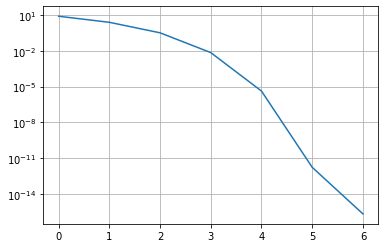

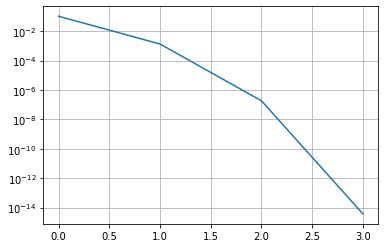

In [19]:
x_start = [[0.5, -3, 8], [-3, 3.2, 9.9]]
for x in x_start:
    result, error = newton_for_system(pr, x)
    print(f'Result: {result}')

    plt.semilogy(numpy.arange(0, len(error), 1), error, base=10)
    plt.grid(True)
    plt.show()
